In [ ]:
"""
target: one layer classification
dataset: fashion mnist, a 10 classes dataset
"""

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import time
import sys
import matplotlib.pyplot as plt
# import d2lzh as d2l

## load fashion mnist data

In [22]:
"""
参考 https://blog.csdn.net/cqy_chen/article/details/80059576
"""
import datetime
import numpy as np
import struct
import matplotlib.pyplot as plt

def read_image(file_name):
    '''
    :param file_name: 文件路径
    :return:  训练或者测试数据
    如下是训练的图片的二进制格式
    [offset] [type]          [value]          [description]
    0000     32 bit integer  0x00000803(2051) magic number
    0004     32 bit integer  60000            number of images
    0008     32 bit integer  28               number of rows
    0012     32 bit integer  28               number of columns
    0016     unsigned byte   ??               pixel
    0017     unsigned byte   ??               pixel
    ........
    xxxx     unsigned byte   ??               pixel
    '''
    file_handle=open(file_name,"rb")  #以二进制打开文档
    file_content=file_handle.read()   #读取到缓冲区中
    head = struct.unpack_from('>IIII', file_content, 0)  # 取前4个整数，返回一个元组
    offset = struct.calcsize('>IIII')
    imgNum = head[1]  #图片数
    width = head[2]   #宽度
    height = head[3]  #高度
    bits = imgNum * width * height  # data一共有60000*28*28个像素值
    bitsString = '>' + str(bits) + 'B'  # fmt格式：'>47040000B'
    imgs = struct.unpack_from(bitsString, file_content, offset)  # 取data数据，返回一个元组
    imgs_array=np.array(imgs).reshape((imgNum,width*height))     #最后将读取的数据reshape成 【图片数，图片像素】二维数组
    return imgs_array
def out_image(img):
    '''
    :param img: 图片像素组
    :return:
    '''
    plt.figure()
    plt.imshow(img)
    plt.show()
def read_label(file_name):
    '''
    :param file_name:
    :return:
    标签的格式如下：
    [offset] [type]          [value]          [description]
    0000     32 bit integer  0x00000801(2049) magic number (MSB first)
    0004     32 bit integer  60000            number of items
    0008     unsigned byte   ??               label
    0009     unsigned byte   ??               label
    ........
    xxxx     unsigned byte   ??               label
    The labels values are 0 to 9.
    '''
    file_handle = open(file_name, "rb")  # 以二进制打开文档
    file_content = file_handle.read()  # 读取到缓冲区中
    head = struct.unpack_from('>II', file_content, 0)  # 取前2个整数，返回一个元组
    offset = struct.calcsize('>II')
    labelNum = head[1]  # label数
    bitsString = '>' + str(labelNum) + 'B'  # fmt格式：'>47040000B'
    label = struct.unpack_from(bitsString, file_content, offset)  # 取data数据，返回一个元组
    return np.array(label)

def get_data():
    # 文件获取
    train_image = "../data/fashion/train-images-idx3-ubyte"
    test_image = "../data/fashion/t10k-images-idx3-ubyte"
    train_label = "../data/fashion/train-labels-idx1-ubyte"
    test_label = "../data/fashion/t10k-labels-idx1-ubyte"
    # 读取数据
    train_x = read_image(train_image)
    test_x = read_image(test_image)
    train_y = read_label(train_label)
    test_y = read_label(test_label)
    print(train_y[0:10])
    print(test_y[0:10])
    out_image(np.array(test_x[0]).reshape(28, 28))
    return train_x,train_y,test_x,test_y


[9 0 0 3 0 2 7 2 5 5]
[9 2 1 1 6 1 4 6 5 7]


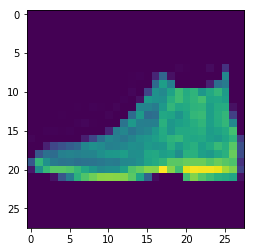

In [23]:
train_x,train_y,test_x,test_y = get_data()

In [ ]:
"""
问题

batch大小如何设置
batch和mini batch的区别
sgd的概念
sparse crossentropy 与 crossentropy的区别

"""